
    \begin{table}
    \fontsize{6}{7.2}\selectfont
    \centering
    \caption{This is a table with scientific results.}
    \medskip
    \begin{tabular}{p{.06\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}}
    \hline
    & \multicolumn{2}{l}{AS19}& \multicolumn{2}{l}{Flow Calib.}& \multicolumn{2}{l}{AS19 Resampled}& \multicolumn{2}{l}{Flow+Mass Calib. S3} \\ 
\cline{2-9} \\ 
 & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th]  \\ 
& percentiles & percentiles & percentiles & percentiles & percentiles & percentiles & percentiles & percentiles  \\ 
& (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE)  \\ 
\hline 
RCP 2.6 & 11 [2, 25] & [6, 19 ]& 8 [2, 18] & [4, 14 ]& 9 [4, 14] & [6, 13 ]& 8 [4, 14] & [6, 12 ] \\ 
RCP 4.5 & 15 [4, 30] & [8, 23 ]& 11 [3, 24] & [6, 18 ]& 12 [5

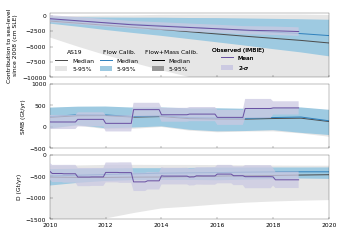

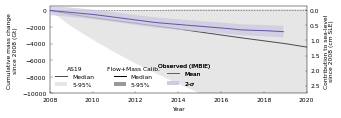

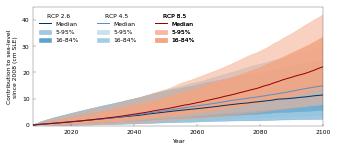

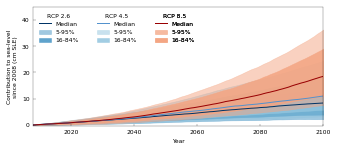

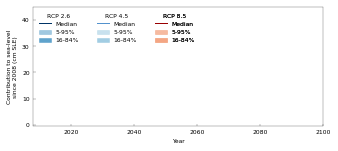

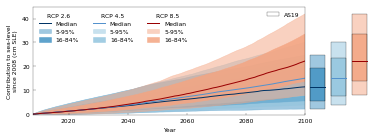

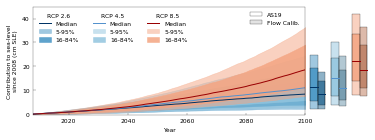

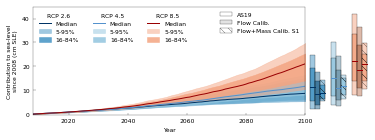

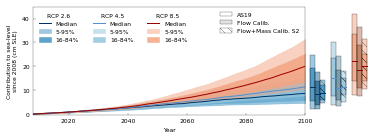

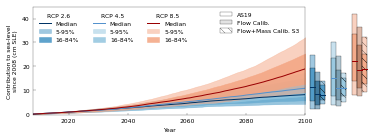

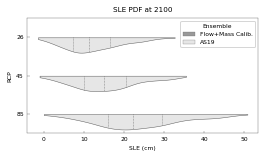

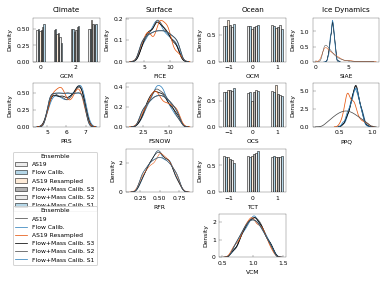

In [55]:
run calibrate-as19.py      

In [2]:
        hatch_pattern_dict = {"Flow+Mass Calib.": "", "Flow Calib.": "......", "AS19": "\\\\\\"}


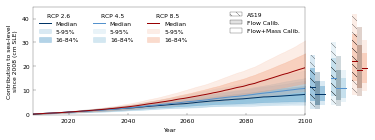

In [8]:
    plot_projection(
        "projection_calibrated_bars.pdf",
        simulated=all_df,
        quantiles=[0.05, 0.16, 0.84, 0.95],
        bars=["AS19", "Flow Calib.", "Flow+Mass Calib."],
    )


In [17]:
df = pd.read_csv("../data/as19/aschwanden_et_al_2019_mc2_2008_norm.csv.gz")

In [19]:
df2 = pd.read_csv("../data/samples/lhs_plus_mc_samples_11_2021.csv")

In [20]:
df2

,Unnamed: 0,GCM,FICE,FSNOW,PRS,RFR,OCM,OCS,TCT,VCM,SIAE,SSAN,PPQ,TEFO,PHIMIN,PHIMAX,ZMIN,ZMAX
0,0,3.0,8.170125,5.947411,6.345824,0.250039,-1.0,0.0,1.0,1.171541,2.173999,3.297782,0.877659,0.017838,7.047823,41.647903,-383.61760,300.05212
1,1,3.0,11.721041,3.033284,5.359238,0.743666,-1.0,-1.0,0.0,1.237056,2.294536,3.388119,0.785081,0.018344,10.219924,40.285652,-345.08533,267.66140
2,2,0.0,4.444838,4.842950,5.645018,0.408384,-1.0,1.0,0.0,1.059073,2.488295,3.288507,0.705308,0.019993,5.784343,40.663002,-400.72190,187.61215
3,3,1.0,6.619700,5.275583,5.742751,0.350849,-1.0,-1.0,0.0,0.663522,2.427556,3.282396,0.582490,0.017218,7.005976,43.740025,-431.93050,164.70787
4,4,0.0,9.842526,3.610858,6.777759,0.559548,-1.0,-1.0,0.0,1.162966,3.031707,3.399951,0.806045,0.022684,10.024467,41.649624,-273.61270,308.17365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,2.0,9.528688,4.495589,6.580603,0.562966,1.0,0.0,1.0,0.759613,2.426797,3.323663,0.735224,0.019891,7.920835,43.128258,-362.57150,334.67487
496,496,0.0,7.621729,4.722272,5.272238,0.376682,1.0,0.0,1.0,1.100711,2.799550,3.309756,0.776087,0.021928,6.956533,43.813980,-325.41953,259.67633
497,497,1.0,11.950584,3.161884,6.091553,0.556378,-1.0,1.0,0.0,1.128304,2.759942,3.369889,0.843122,0.023334,5.560717,44.547977,-454.28340,210.49585
498,498,1.0,4.772243,2.945351,6.573172,0.486140,0.0,0.0,1.0,0.741604,2.605263,3.321665,0.782199,0.019833,6.404755,42.077350,-412.92697,298.50630


In [24]:
    as19_calib_resampled_1 = resample_ensemble_by_data(observed, calib, rcps, fudge_factor=1)


In [27]:
q_df

,RCP,Ensemble,0.5,0.05,0.95,0.16,0.84,90%,68%
0,26,AS19,11.389640,2.110234,24.633992,5.510413,19.468140,22.523758,13.957727
1,26,AS19 Resampled,8.930553,4.224079,14.223408,6.008539,12.510270,9.999329,6.501730
2,26,Flow Calib.,8.366629,2.230025,17.689693,3.941843,13.932290,15.459668,9.990447
3,26,Flow+Mass Calib. S1,8.670132,5.364541,14.158744,5.957624,12.164820,8.794204,6.207197
4,26,Flow+Mass Calib. S2,8.245949,4.448579,14.225223,5.719037,11.783537,9.776644,6.064500
5,26,Flow+Mass Calib. S3,8.338473,4.438016,14.556696,5.507866,12.120996,10.118681,6.613130
6,45,AS19,14.973399,3.864096,30.104720,7.718508,23.417285,26.240624,15.698777
7,45,AS19 Resampled,12.102394,5.533941,20.145092,8.375900,16.753957,14.611150,8.378057
8,45,Flow Calib.,11.018478,3.324697,24.441752,5.819384,18.412156,21.117055,12.592771
9,45,Flow+Mass Calib. S1,11.692805,6.124405,16.474828,8.705169,15.589780,10.350424,6.884611


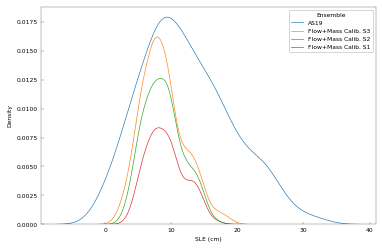

In [42]:
rcp = 26
fig = plt.figure()
ax = fig.add_subplot(111)
m_df = all_2100_df[all_2100_df["RCP"] == rcp]
sns.kdeplot(data=m_df, x="SLE (cm)", hue="Ensemble", hue_order=["AS19", "Flow+Mass Calib. S3",  "Flow+Mass Calib. S2", "Flow+Mass Calib. S1"])
fig.savefig("test.pdf")


In [32]:
!open test.pdf

In [50]:
sns.boxplot?

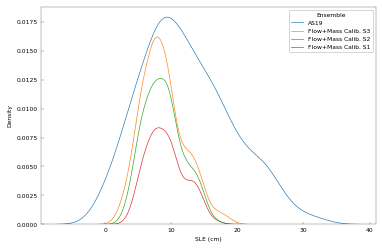

In [49]:
rcp = 26
fig = plt.figure()
ax = fig.add_subplot(111)
m_df = all_2100_df[all_2100_df["RCP"] == rcp]
sns.kdeplot(data=m_df, x="SLE (cm)", hue="Ensemble", hue_order=["AS19", "Flow+Mass Calib. S3",  "Flow+Mass Calib. S2", "Flow+Mass Calib. S1"])
fig.savefig("test.pdf")